In [1]:
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2 --extra-index-url https://download.pytorch.org/whl/cu118
!pip install ultralytics --upgrade

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 905.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 106.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 102.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.1.0
    Uninstalling triton-3.1.0:
      Successfully uninstalled triton-3.1.0
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu124
    Uninstalling torch-2.5.1+cu124:
      Successfully uninstalled torch-2.5.1+cu124
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1+cu124
    Uninstalling torchvision-0.20.1+cu124:
      Successfully uninstalled torchvision-0.20.1+cu124
  Att

In [2]:
import os
os.environ["CUDNN_DISABLE_GRAPH"] = "1"
os.environ["LC_ALL"] = "en_US.UTF-8"
os.environ["LANG"] = "en_US.UTF-8"

In [3]:
!nvidia-smi

from google.colab import drive
drive.mount('/content/drive')

Wed Feb 19 22:42:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P0             48W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [4]:
import os

# Force the visible GPU to be device 0.
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import torch
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())


CUDA available: True
CUDA device count: 1


In [5]:
# Install required libraries
!pip install -q \
  autodistill \
  autodistill-grounded-sam \
  autodistill-yolov8 \
  roboflow \
  supervision==0.24.0

HOME = os.getcwd()
print("Current working directory:", HOME)

# Create a directory for images
!mkdir {HOME}/images

# Set up a videos directory in the HOME folder
!mkdir -p {HOME}/videos


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.0/527.0 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 25.7 MB/s eta 0:00:00
Current working directory: /content


In [ ]:
# Change to the videos directory
%cd {HOME}/videos

# Copy the video from Google Drive to the "videos" folder
!cp "/content/drive/MyDrive/Agrointel/Video/OG1.mp4" "{HOME}/videos/"
!cp "/content/drive/MyDrive/Agrointel/Video/OG2.mp4" "{HOME}/videos/"
!cp "/content/drive/MyDrive/Agrointel/Video/OG3.mp4" "{HOME}/videos/"
!cp "/content/drive/MyDrive/Agrointel/Video/OG4.mp4" "{HOME}/videos/"
!cp "/content/drive/MyDrive/Agrointel/Video/OG5.mp4" "{HOME}/videos/"
!cp "/content/drive/MyDrive/Agrointel/Video/OG6.mp4" "{HOME}/videos/"
!cp "/content/drive/MyDrive/Agrointel/Video/OG7.mp4" "{HOME}/videos/"
!cp "/content/drive/MyDrive/Agrointel/Video/OG8.mp4" "{HOME}/videos/"


/content/videos


In [ ]:
# Define paths and parameters
VIDEO_DIR_PATH = f"{HOME}/videos"
IMAGE_DIR_PATH = f"{HOME}/images"
FRAME_STRIDE = 60

In [ ]:
import supervision as sv
from tqdm.notebook import tqdm

video_paths = sv.list_files_with_extensions(
    directory=VIDEO_DIR_PATH,
    extensions=["mov", "mp4"]
)

# Separate test and train video paths (using first 2 as test, rest as train)
TEST_VIDEO_PATHS, TRAIN_VIDEO_PATHS = video_paths[:2], video_paths[2:]

for video_path in tqdm(TRAIN_VIDEO_PATHS):
    video_name = video_path.stem
    image_name_pattern = video_name + "-{:05d}.png"
    with sv.ImageSink(target_dir_path=IMAGE_DIR_PATH, image_name_pattern=image_name_pattern) as sink:
        for image in sv.get_video_frames_generator(source_path=str(video_path), stride=FRAME_STRIDE):
            sink.save_image(image=image)


  0%|          | 0/6 [00:00<?, ?it/s]

Image count: 367


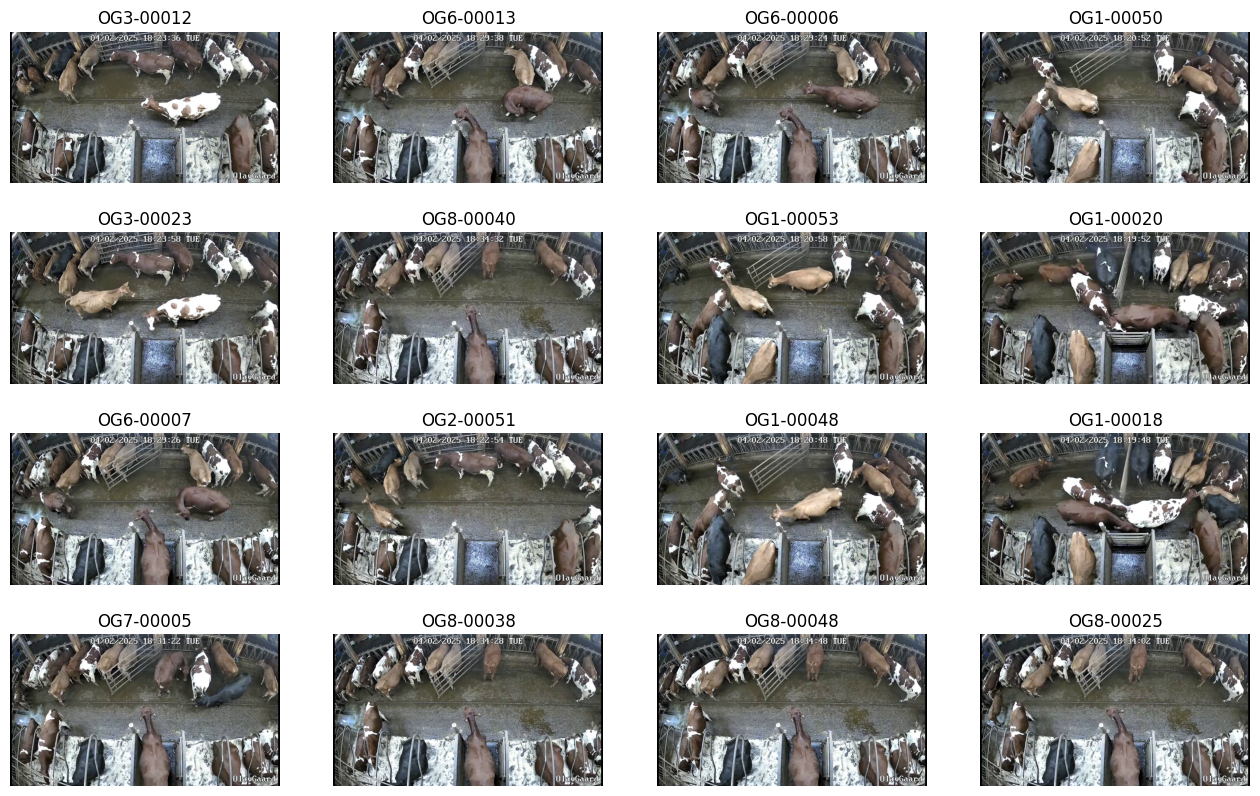

In [ ]:
import supervision as sv

image_paths = sv.list_files_with_extensions(
    directory=IMAGE_DIR_PATH,
    extensions=["png", "jpg", "jpeg"]
)

print('Image count:', len(image_paths))

IMAGE_DIR_PATH = f"{HOME}/images"
SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (16, 10)

import cv2
import supervision as sv

titles = [image_path.stem for image_path in image_paths[:SAMPLE_SIZE]]
images = [cv2.imread(str(image_path)) for image_path in image_paths[:SAMPLE_SIZE]]

sv.plot_images_grid(images=images, titles=titles, grid_size=SAMPLE_GRID_SIZE, size=SAMPLE_PLOT_SIZE)


In [ ]:
from autodistill.detection import CaptionOntology

# Updated ontology for detecting both cows and people
ontology = CaptionOntology({
    "cow": "cow",
    "person": "person"
})

# Set the directory to save the annotated dataset
DATASET_DIR_PATH = f"{HOME}/cow&p2-2"

from autodistill_grounded_sam import GroundedSAM

# Initialize the GroundedSAM annotator with the updated ontology
base_model = GroundedSAM(ontology=ontology)
dataset = base_model.label(
    input_folder=IMAGE_DIR_PATH,
    extension=".png",
    output_folder=DATASET_DIR_PATH
)

# The following paths are generated after annotation for training
ANNOTATIONS_DIRECTORY_PATH = f"{HOME}/cow&p2-2/train/labels"
IMAGES_DIRECTORY_PATH = f"{HOME}/cow&p2-2/train/images"
DATA_YAML_PATH = f"{HOME}/cow&p2-2/data.yaml"


trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/images/OG3-00012.png:   0%|          | 0/367 [00:00<?, ?it/s]The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
Labeling /content/images/OG6-00042.png: 100%|██████████| 367/367 [06:43<00:00,  1.10s/it]


Labeled dataset created - ready for distillation.


Number of training images: 293


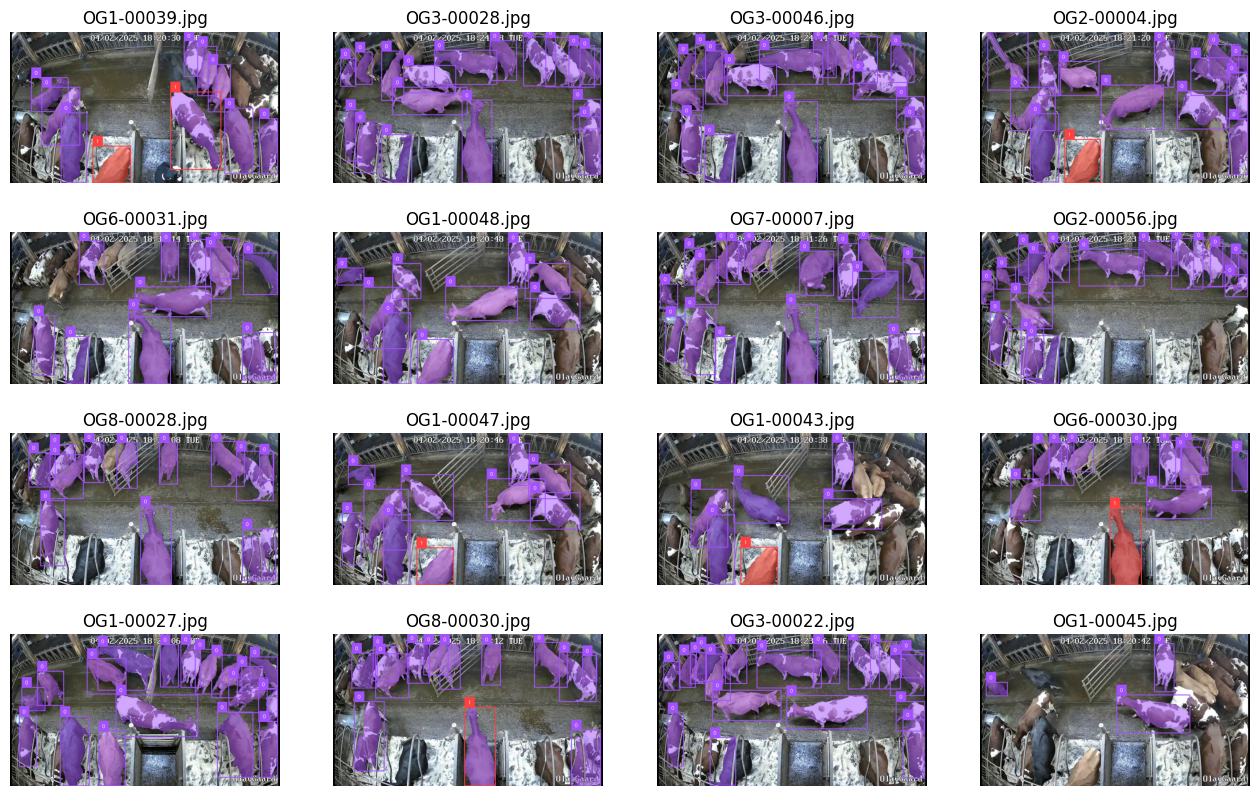

In [ ]:
import supervision as sv

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=IMAGES_DIRECTORY_PATH,
    annotations_directory_path=ANNOTATIONS_DIRECTORY_PATH,
    data_yaml_path=DATA_YAML_PATH
)

print("Number of training images:", len(dataset))

import supervision as sv
from pathlib import Path

mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

images = []
image_names = []
for i, (image_path, image, annotation) in enumerate(dataset):
    if i == SAMPLE_SIZE:
        break
    annotated_image = image.copy()
    annotated_image = mask_annotator.annotate(scene=annotated_image, detections=annotation)
    annotated_image = box_annotator.annotate(scene=annotated_image, detections=annotation)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=annotation)

    image_names.append(Path(image_path).name)
    images.append(annotated_image)

sv.plot_images_grid(
    images=images,
    titles=image_names,
    grid_size=SAMPLE_GRID_SIZE,
    size=SAMPLE_PLOT_SIZE
)


In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="sRQusXPtTPCZC5YBW97W")
project = rf.workspace("agrointel-mwd9x").project("c-p3")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to C&P3-1 in yolov8:: 100%|██████████| 852/852 [00:00<00:00, 5920.61it/s]


In [7]:
# Set the directory to save the annotated dataset
DATASET_DIR_PATH = f"{HOME}/C&P3-1"

# The following paths are generated after annotation for training
ANNOTATIONS_DIRECTORY_PATH = f"{HOME}/C&P3-1/train/labels"
IMAGES_DIRECTORY_PATH = f"{HOME}/C&P3-1/train/images"
DATA_YAML_PATH = f"{HOME}/C&P3-1/data.yaml"

In [8]:
%cd {HOME}

from autodistill_yolov8 import YOLOv8

# Initialize the YOLOv8 model using the pretrained "yolov8n.pt" weights.
# This will be fine-tuned on your custom dataset (cows and people).
target_model = YOLOv8("yolov8n.pt")
target_model.train(DATA_YAML_PATH, epochs=50, device="cuda:0")



# Construct the path to your training results folder
train_folder = os.path.join(HOME, "runs", "detect", "train")

# List the contents of that folder
files = os.listdir(train_folder)
print("Files in the training folder:", files)


/content


100%|██████████| 6.23M/6.23M [00:00<00:00, 308MB/s]
New https://pypi.org/project/ultralytics/8.3.77 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.81 🚀 Python-3.11.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/C&P3-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visuali

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: lukasmolvaer (lukasmolvaer-h-yskolen-kristiania) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias
train: Scanning /content/C&P3-1/train/labels... 351 images, 0 backgrounds, 0 corrupt: 100%|██████████| 351/351 [00:00<00:00, 1192.59it/s]
train: New cache created: /content/C&P3-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Scanning /content/C&P3-1/valid/labels... 71 images, 0 backgrounds, 0 corrupt: 100%|██████████| 71/71 [00:00<00:00, 1354.15it/s]
val: New cache created: /content/C&P3-1/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem

Files in the training folder: ['F1_curve.png', 'val_batch1_labels.jpg', 'confusion_matrix.png', 'train_batch2.jpg', 'val_batch0_labels.jpg', 'args.yaml', 'PR_curve.png', 'results.png', 'R_curve.png', 'val_batch1_pred.jpg', 'results.csv', 'train_batch1.jpg', 'labels.jpg', 'val_batch2_pred.jpg', 'labels_correlogram.jpg', 'weights', 'val_batch0_pred.jpg', 'P_curve.png', 'train_batch0.jpg', 'events.out.tfevents.1740005056.1b450f9c07b5.6443.0', 'val_batch2_labels.jpg']


/content


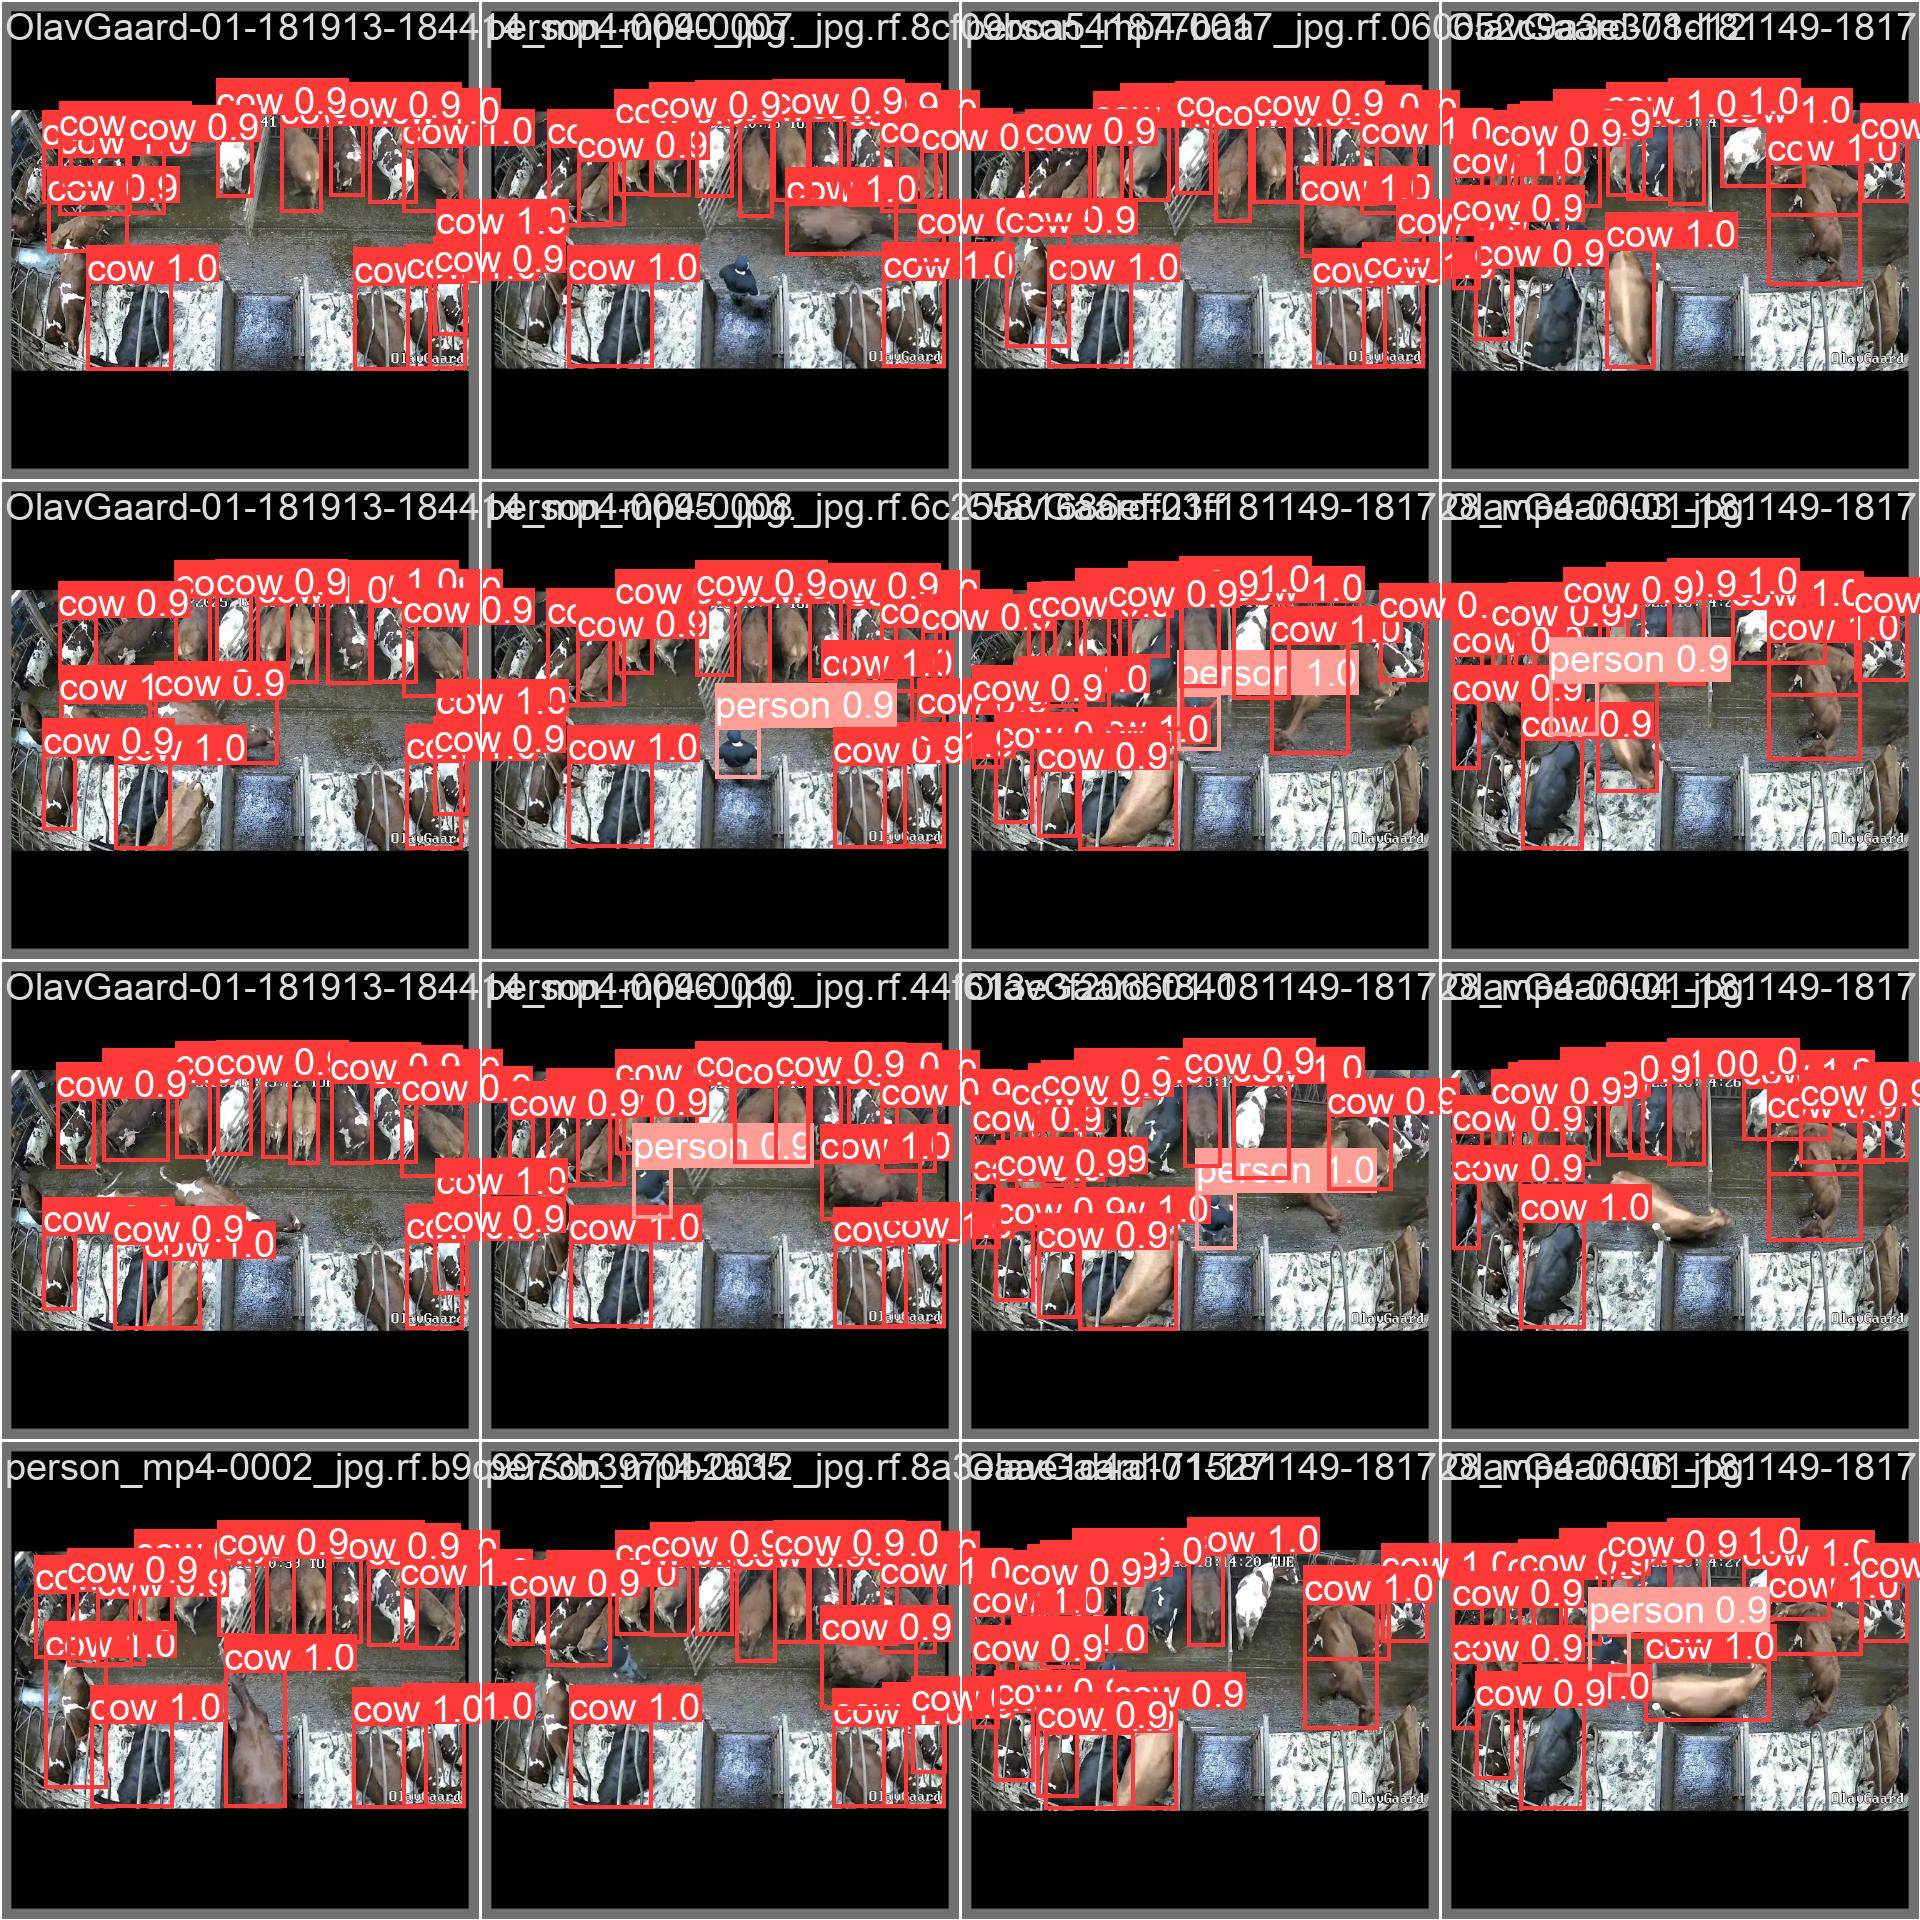

In [9]:
%cd {HOME}

from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)


/content


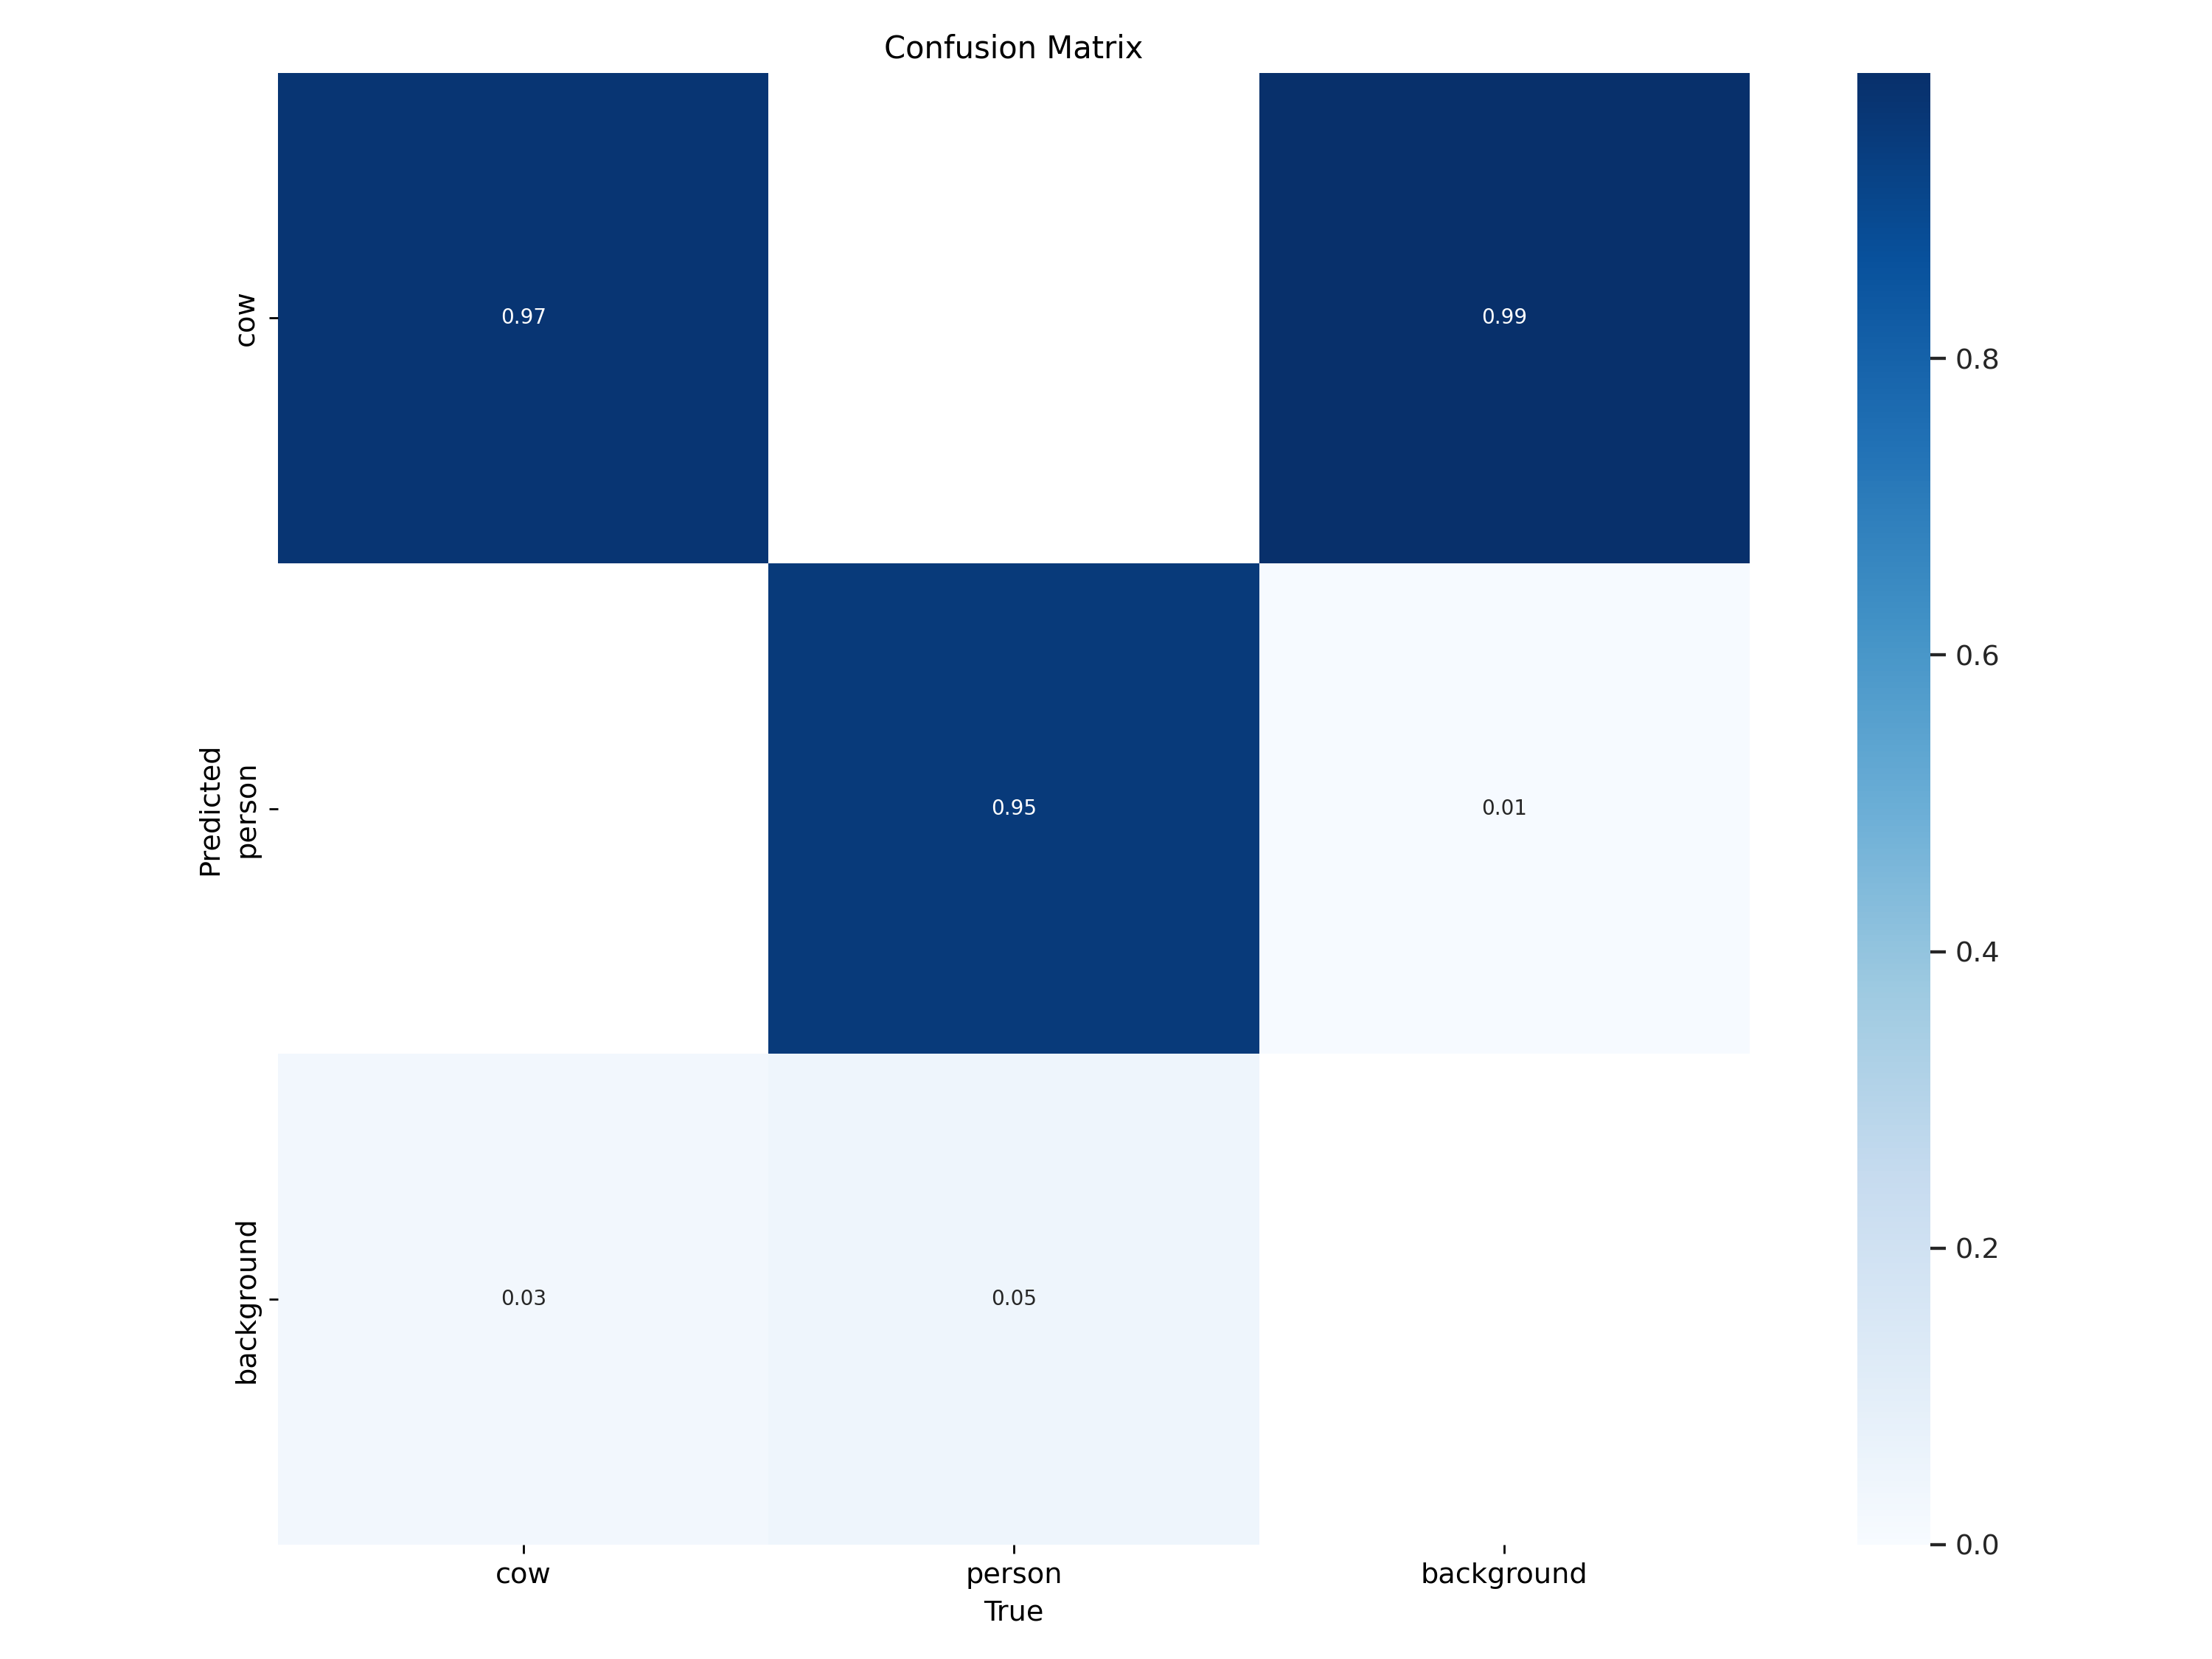

In [10]:
%cd {HOME}

from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


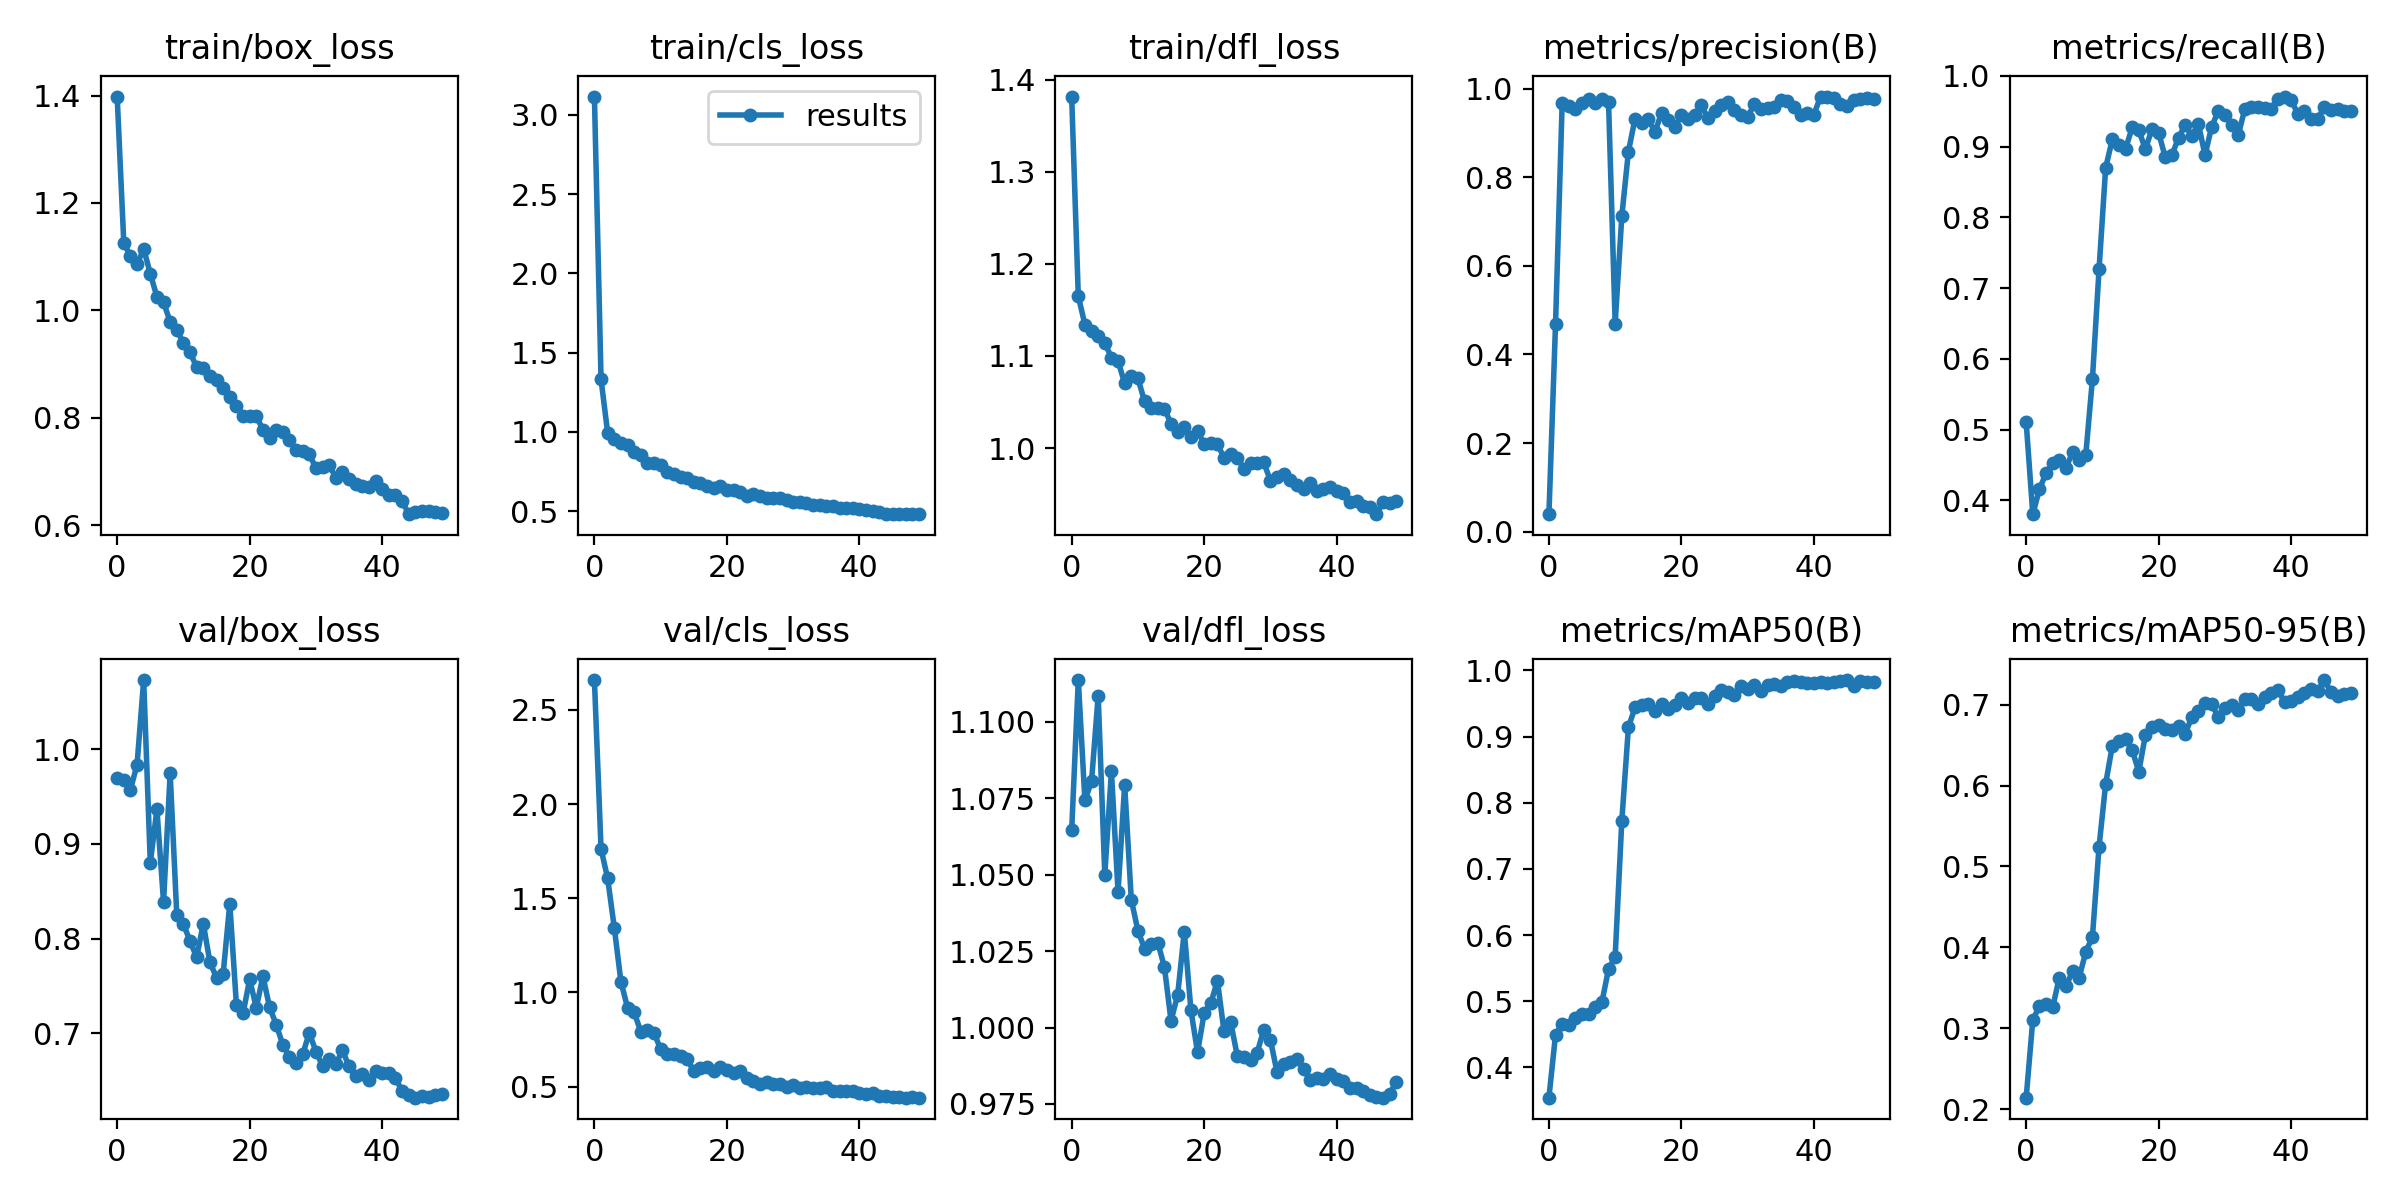

In [11]:
%cd {HOME}

from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
from ultralytics import YOLO

# Define paths
HOME = os.getcwd()
TRAINED_MODEL_PATH = os.path.join(HOME, "runs", "detect", "train", "weights", "best.pt")
INPUT_VIDEO_PATH = os.path.join(HOME, "OGX2.mp4")
OUTPUT_DIR = "/content"  # We'll save the output in /content

# Load the trained model
model = YOLO(TRAINED_MODEL_PATH)

# Run prediction:
# The 'project' parameter sets the parent folder for saving,
# and 'name' sets the name of the folder where results will be stored.
results = model.predict(
    source=INPUT_VIDEO_PATH,
    save=True,
    project=OUTPUT_DIR,
    name="output"  # The results will be saved in /content/output
)

# Optionally, list the output folder contents to verify the saved file:
output_folder = os.path.join(OUTPUT_DIR, "output")
print("Files in output folder:", os.listdir(output_folder))






    WARNING ⚠️ stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/3846) /content/OGX2.mp4: 384x640 27 cows, 112.2ms
video 1/1 (2/3846) /content/OGX2.mp4: 384x640 28 cows, 6.6ms
video 1/1 (3/3846) /content/OGX2.mp4: 384x640 29 cows, 6.4ms
video 1/1 (4/3846) /content/OGX2.mp4: 384x640 29 cows, 6.5ms
video 1/1 (5/3846) /content/OGX2.mp4: 384x640 29 cows, 6.4ms
video 1/1 (6/3846) /content/OGX2.mp4: 384x640 29 cows, 6.4ms
video 1/1 (7/3846) /content/OGX2.mp4: 384x640 29 cows, 6.9ms
video 1/1 (8/3846) /content/OG

Files in output folder: ['OGX2.mp4']


In [ ]:
# Now that your model is trained and saved (TRAINED_MODEL_PATH),
# you can load it in any other code (for example, your tracking script)
# to perform detections and then extract bounding box coordinates,
# confidence scores, and class labels for tracking and zone timing.
#
# For example, in your separate tracking code, you might do:
#
#   from autodistill_yolov8 import YOLOv8
#
#   # Load the trained model
#   tracking_model = YOLOv8(TRAINED_MODEL_PATH)
#
#   # Run prediction on a frame (or video)
#   results = tracking_model.predict(source="path_to_your_video_or_image")
#
#   # The 'results' object will contain bounding boxes, classes, etc.
#   # You can then extract the coordinates and use them for your tracking logic.
#
# This way you separate the model training from your tracking data analysis,
# and simply load the updated model whenever you need to perform inference.


In [ ]:
import shutil

# This will create a zip archive named 'dataset.zip' in the /content folder,
# containing everything in /content/dataset.
shutil.make_archive('/content/dataset', 'zip', '/content/dataset')


'/content/dataset.zip'

In [ ]:
import zipfile

zip_path = '/content/dataset2.zip'      # Adjust this if your zip file has a different name or path.
extract_path = '/content/dataset'  # This is where you want the files to be extracted.

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


Extraction complete!


In [ ]:
!ls /content/runs/detect/train/


args.yaml					   P_curve.png	     train_batch1.jpg
confusion_matrix.png				   PR_curve.png      train_batch2.jpg
events.out.tfevents.1738864379.a0b4421e883f.356.0  R_curve.png	     val_batch0_labels.jpg
F1_curve.png					   results.csv	     val_batch0_pred.jpg
labels_correlogram.jpg				   results.png	     weights
labels.jpg					   train_batch0.jpg
